<a href="https://colab.research.google.com/github/sanyasirao-surada/research_portal/blob/main/MCA_ML_LAB_16_07_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [ ]:
# Save to Excel
# index=False avoids writing row numbers to Excel.
df.to_excel('titanic_dataset.xlsx', index=False)

In [ ]:
# Save as CSV
df.to_csv('titanic_dataset.csv', index=False)

In [ ]:
# Download the file to your local system
# files.download() will prompt you to download the file in Colab.
from google.colab import files
files.download('titanic_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the file
from google.colab import files
files.download('titanic_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# This will open a file upload box where you can choose your .csv or .xlsx file from your computer.
from google.colab import files
uploaded = files.upload()

Saving titanic_dataset 18-07-25.xlsx to titanic_dataset 18-07-25.xlsx


**Read the file into a DataFrame**

In [ ]:
# Replace 'yourfile.csv' with the actual filename
df = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
# Replace 'yourfile.xlsx' with your Excel file name
df = pd.read_excel('/content/titanic_dataset.xlsx')

**Load Excel/CSV from Google Drive in Colab**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
drive_path= "/content/drive/MyDrive/ML LAB CODES AND DATASETS/titanic_dataset 18-07-25.xlsx"

In [39]:
# Load a specific sheet
df = pd.read_excel(drive_path, sheet_name='EXP-1')  # replace 'Sheet1' with your actual sheet name

In [79]:
xls = pd.ExcelFile(drive_path)
print(xls.sheet_names)  # Lists all available sheets

# Then load the one you want
df = xls.parse('EXP-1')

['EXP-1']


In [58]:
csv_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/titanic_dataset from seaborn.csv'
df_csv = pd.read_csv(csv_path)

**Save CSV/Excel Back to Google Drive**

In [61]:
save_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/output.csv'
df.to_csv(save_path, index=False)

In [62]:
save_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/output.xlsx'
df.to_excel(save_path, index=False)

In [83]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sanyasirao-surada/research_portal/refs/heads/main/titanic_dataset%20from%20seaborn.csv'
df = pd.read_csv(url)

In [ ]:
# Step 2: Basic Data Exploration
print("Dataset Overview:\n")
print(df.head())
print("\nSummary Statistics:\n")
print(df.describe(include='all'))
print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset Overview:

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Summary Statistics:

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN        

In [ ]:
# Step 3: Data Preparation Activities

# 3a. Filtering passengers who survived
print("\n📌 Filtering passengers who survived:")
survived = df[df['survived'] == 1]
print(survived[['sex', 'age', 'pclass', 'survived']].head())


📌 Filtering passengers who survived:
      sex   age  pclass  survived
1  female  38.0       1         1
2  female  26.0       3         1
3  female  35.0       1         1
8  female  27.0       3         1
9  female  14.0       2         1


In [ ]:
# 3b. Grouping by 'sex' and 'pclass' to count survivors
print("\n📌 Grouping by 'sex' and 'pclass' to count survivors:")
grouped = df.groupby(['sex', 'pclass'])['survived'].sum()
print(grouped)


📌 Grouping by 'sex' and 'pclass' to count survivors:
sex     pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: survived, dtype: int64


In [ ]:
# 3c. Sorting passengers by age (using 'who' instead of 'name')
print("\n📌 Sorting passengers by age:")
sorted_df = df.sort_values(by='age')
print(sorted_df[['who', 'age', 'sex']].head())


📌 Sorting passengers by age:
       who   age     sex
803  child  0.42    male
755  child  0.67    male
644  child  0.75  female
469  child  0.75  female
78   child  0.83    male


In [ ]:
# Step 4: Data Visualization
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Survival Count by Gender')

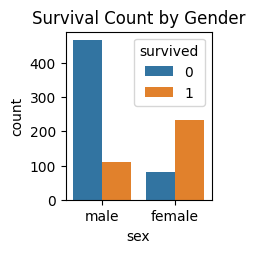

In [ ]:
# 4a. Bar Plot: Count of survivors by sex
plt.subplot(2, 3, 1)
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")

Text(0.5, 1.0, 'Age Distribution')

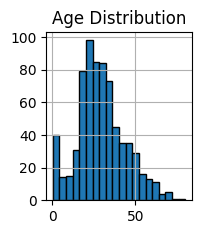

In [ ]:
# 4b. Histogram: Age distribution
plt.subplot(2, 3, 2)
df['age'].dropna().hist(bins=20, edgecolor='black')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Fare Distribution with KDE')

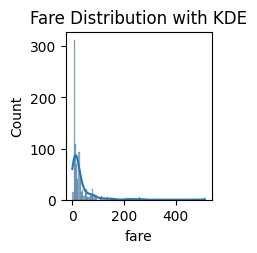

In [ ]:
# 4c. Distribution Plot: Fare
plt.subplot(2, 3, 3)
sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution with KDE")

Text(0.5, 1.0, 'Box Plot of Age by Class')

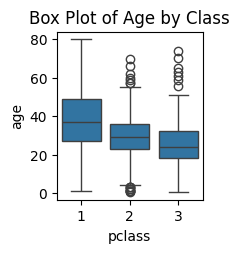

In [ ]:
# 4d. Box Plot: Age vs Class
plt.subplot(2, 3, 4)
sns.boxplot(x='pclass', y='age', data=df)
plt.title("Box Plot of Age by Class")

Text(0.5, 1.0, 'Age vs Fare (Survival)')

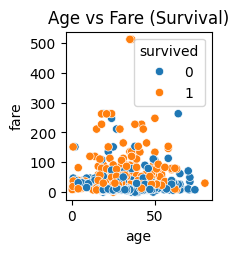

In [ ]:
# 4e. Scatter Plot: Age vs Fare (colored by survival)
plt.subplot(2, 3, 5)
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (Survival)")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>